# Task: REG-Cricket

In [ ]:
#Task: REG-Cricket : Predicting number of 4s of players trained on dataset of IPL 2022 Batters using Linear Regression
#dataset : "IPL 2022 Batters.csv"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading csv dataset using pandas

In [2]:
#Reading csv dataset using pandas
df = pd.read_csv("IPL 2022 Batters.csv")

In [3]:
df

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Fazalhaq Farooqi,3,1,1,2,2*,-,8,25.00,0,0,0
158,Jagadeesha Suchith,5,2,0,2,2,1,8,25.00,0,0,0
159,Tim Southee,9,5,1,2,1*,0.5,12,16.66,0,0,0
160,Nathan Coulter-Nile,1,1,1,1,1*,-,2,50.00,0,0,0


### Handling Null Values

In [ ]:
# "Avg" column values have calculated by Runs/(Inns-NO) clearly
# "Avg" column have some missing values shown by '-' where player has played only 1 innings and has remained not out.
# Some values in HS column which depict not out score have * in them, so have to remove * to use these values

In [4]:
#To account for - in Avg, there is no way to fill the data, so have to drop the rows.
#As there are not much such rows, it shouldn't affect the results much.
df.drop(index=df[df['Avg'] == '-'].index, inplace=True)

In [5]:
#Removing * from HS values
df['HS'] = df['HS'].apply(lambda score:score.split('*')[0])

In [6]:
df

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Navdeep Saini,2,1,0,2,2,2,2,100.00,0,0,0
155,Tristan Stubbs,2,2,0,2,2,1,4,50.00,0,0,0
156,Pradeep Sangwan,3,1,0,2,2,2,5,40.00,0,0,0
158,Jagadeesha Suchith,5,2,0,2,2,1,8,25.00,0,0,0


### Plotting graphs using matplotlib

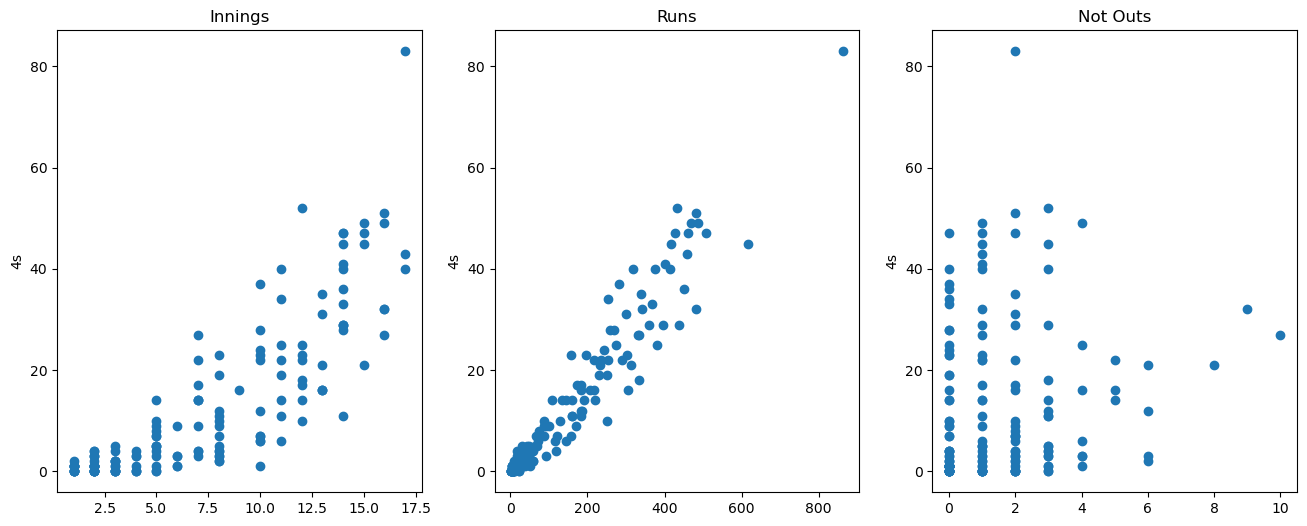

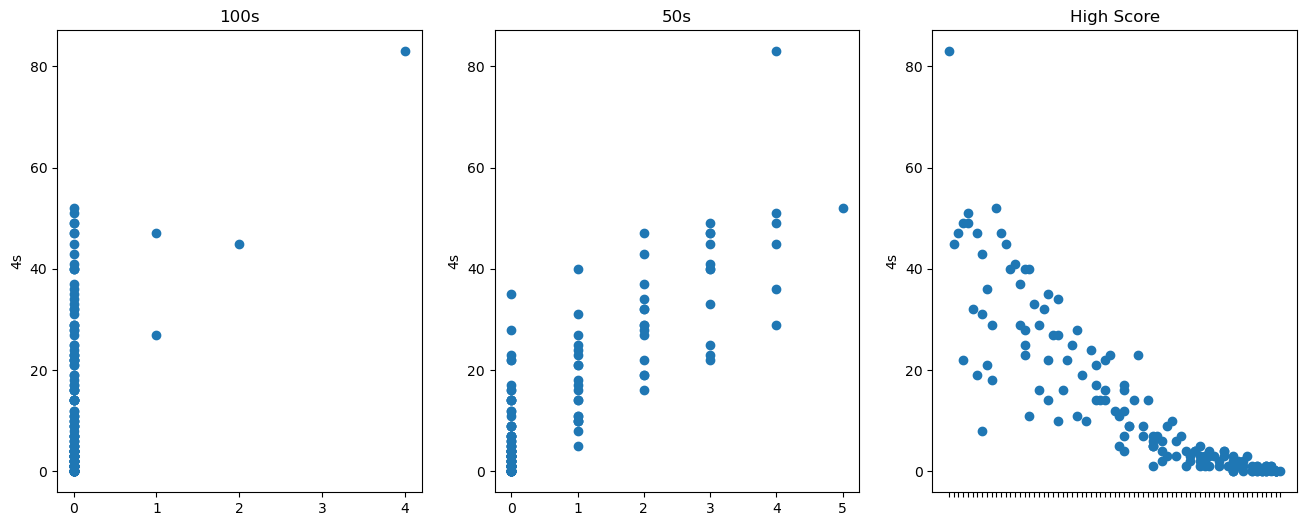

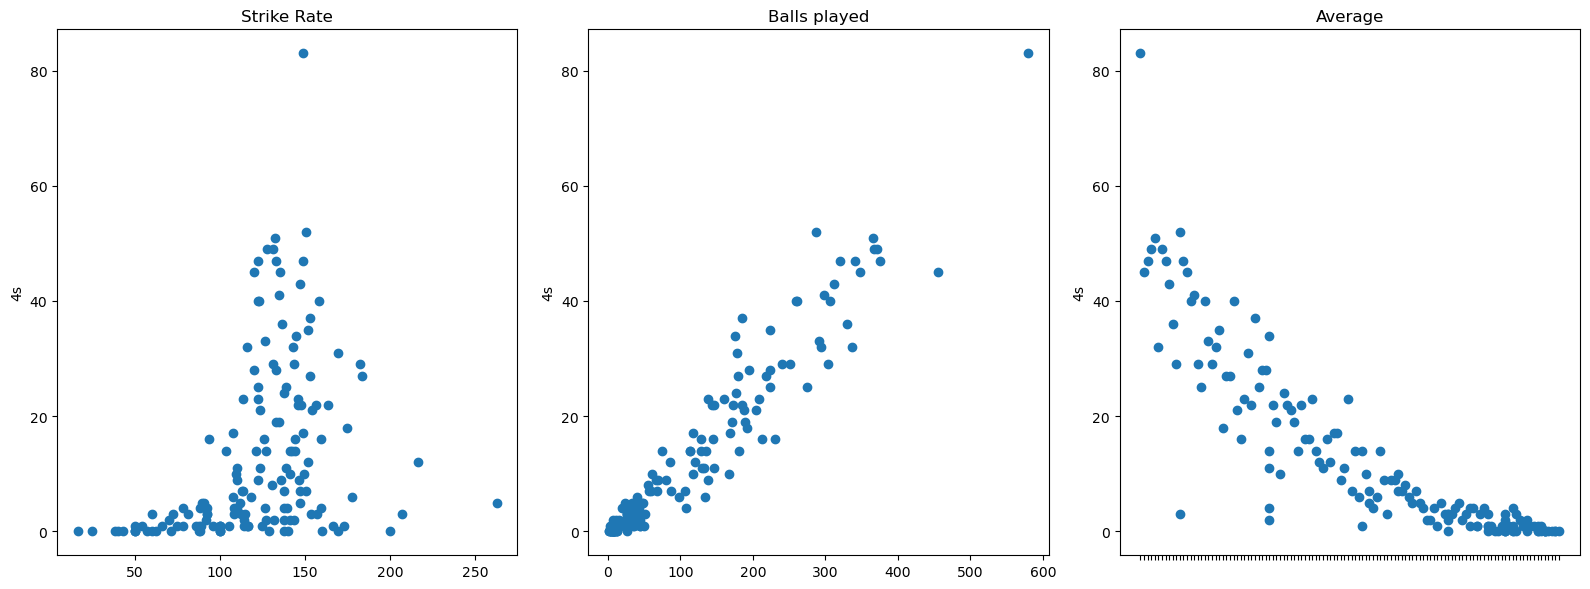

In [7]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['Inns'],df['4s'],'o')
axes[0].set_title("Innings")
axes[0].set_ylabel("4s")

axes[1].plot(df['Runs'],df['4s'],'o')
axes[1].set_title("Runs")
axes[1].set_ylabel("4s")

axes[2].plot(df['NO'],df['4s'],'o')
axes[2].set_title("Not Outs")
axes[2].set_ylabel("4s")

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['100'],df['4s'],'o')
axes[0].set_title("100s");
axes[0].set_ylabel("4s")

axes[1].plot(df['50'],df['4s'],'o')
axes[1].set_title("50s");
axes[1].set_ylabel("4s")

axes[2].plot(df['HS'],df['4s'],'o')
axes[2].set_title("High Score");
axes[2].set_ylabel("4s")

plt.xticks(color='w')
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['SR'],df['4s'],'o')
axes[0].set_title("Strike Rate");
axes[0].set_ylabel("4s")

axes[1].plot(df['BF'],df['4s'],'o')
axes[1].set_title("Balls played")
axes[1].set_ylabel("4s")

axes[2].plot(df['Avg'],df['4s'],'o')
axes[2].set_ylabel("4s")
axes[2].set_title("Average")
plt.xticks(color='w')
plt.tight_layout();

#### This shows that maybe  Runs, BF, Inns can be used to predict Target Value (4s)

### Linear regression on the number of 4s.


Creating two data frames, one for features and one for target 

In [ ]:
# Features chosen : Innings, Runs, Balls PLayed

In [8]:
X = df[['Runs','BF','Inns']]
y = df['4s']

### Splitting dataset into test, train datasets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
#Finding predictions on test data from trained model
test_predictions = model.predict(X_test)
test_predictions[test_predictions < 0] = 0 #(changing negative values to 0)

#Finding predictions on trained data to find error.
train_predictions2 = model.predict(X_train)
train_predictions2[train_predictions2 < 0] = 0

### Predicted values

In [12]:
test_predictions

array([ 0.09436431,  0.18066702,  2.98175422,  0.        ,  2.3385068 ,
        6.04252231, 20.51935357,  2.37255936, 23.06048909, 15.86145321,
        7.6352322 , 23.87685731,  3.54324057,  3.88013481, 33.32224142,
        1.17588482,  4.36935773, 26.38445628, 14.67101611,  0.        ,
        8.92432157, 39.4027142 , 17.63859724, 36.84351251, 34.68489389,
        1.47664735,  4.08640337,  6.04759149,  0.        ,  0.13855524,
       34.29510207,  0.4716806 ,  8.42521766,  0.        ,  0.        ,
       23.79731351,  0.13816582,  2.51540256,  0.38784646, 25.97997774,
        9.66374661, 13.85230528, 39.71205133, 25.08939292, 23.8552809 ,
        0.        ,  0.        ])

### Mean Square Error(MSE)

In [13]:
MSE_Train = mean_squared_error(y_train,train_predictions2)

In [14]:
MSE_Train #mean square error on train data predictions

16.259383007264656

In [15]:
MSE_Test = mean_squared_error(y_test,test_predictions)

In [16]:
MSE_Test #mean square error on test data predictions

16.692278692702565